In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [4]:
df.all()

R&D Spend          False
Administration      True
Marketing Spend    False
State               True
Profit              True
dtype: bool

In [5]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
#renaming the colums
sk=df.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},axis=1)
sk.head(10)

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
plt.rcParams['figure.figsize']=(6,3)
plt.rcParams['figure.dpi']=200

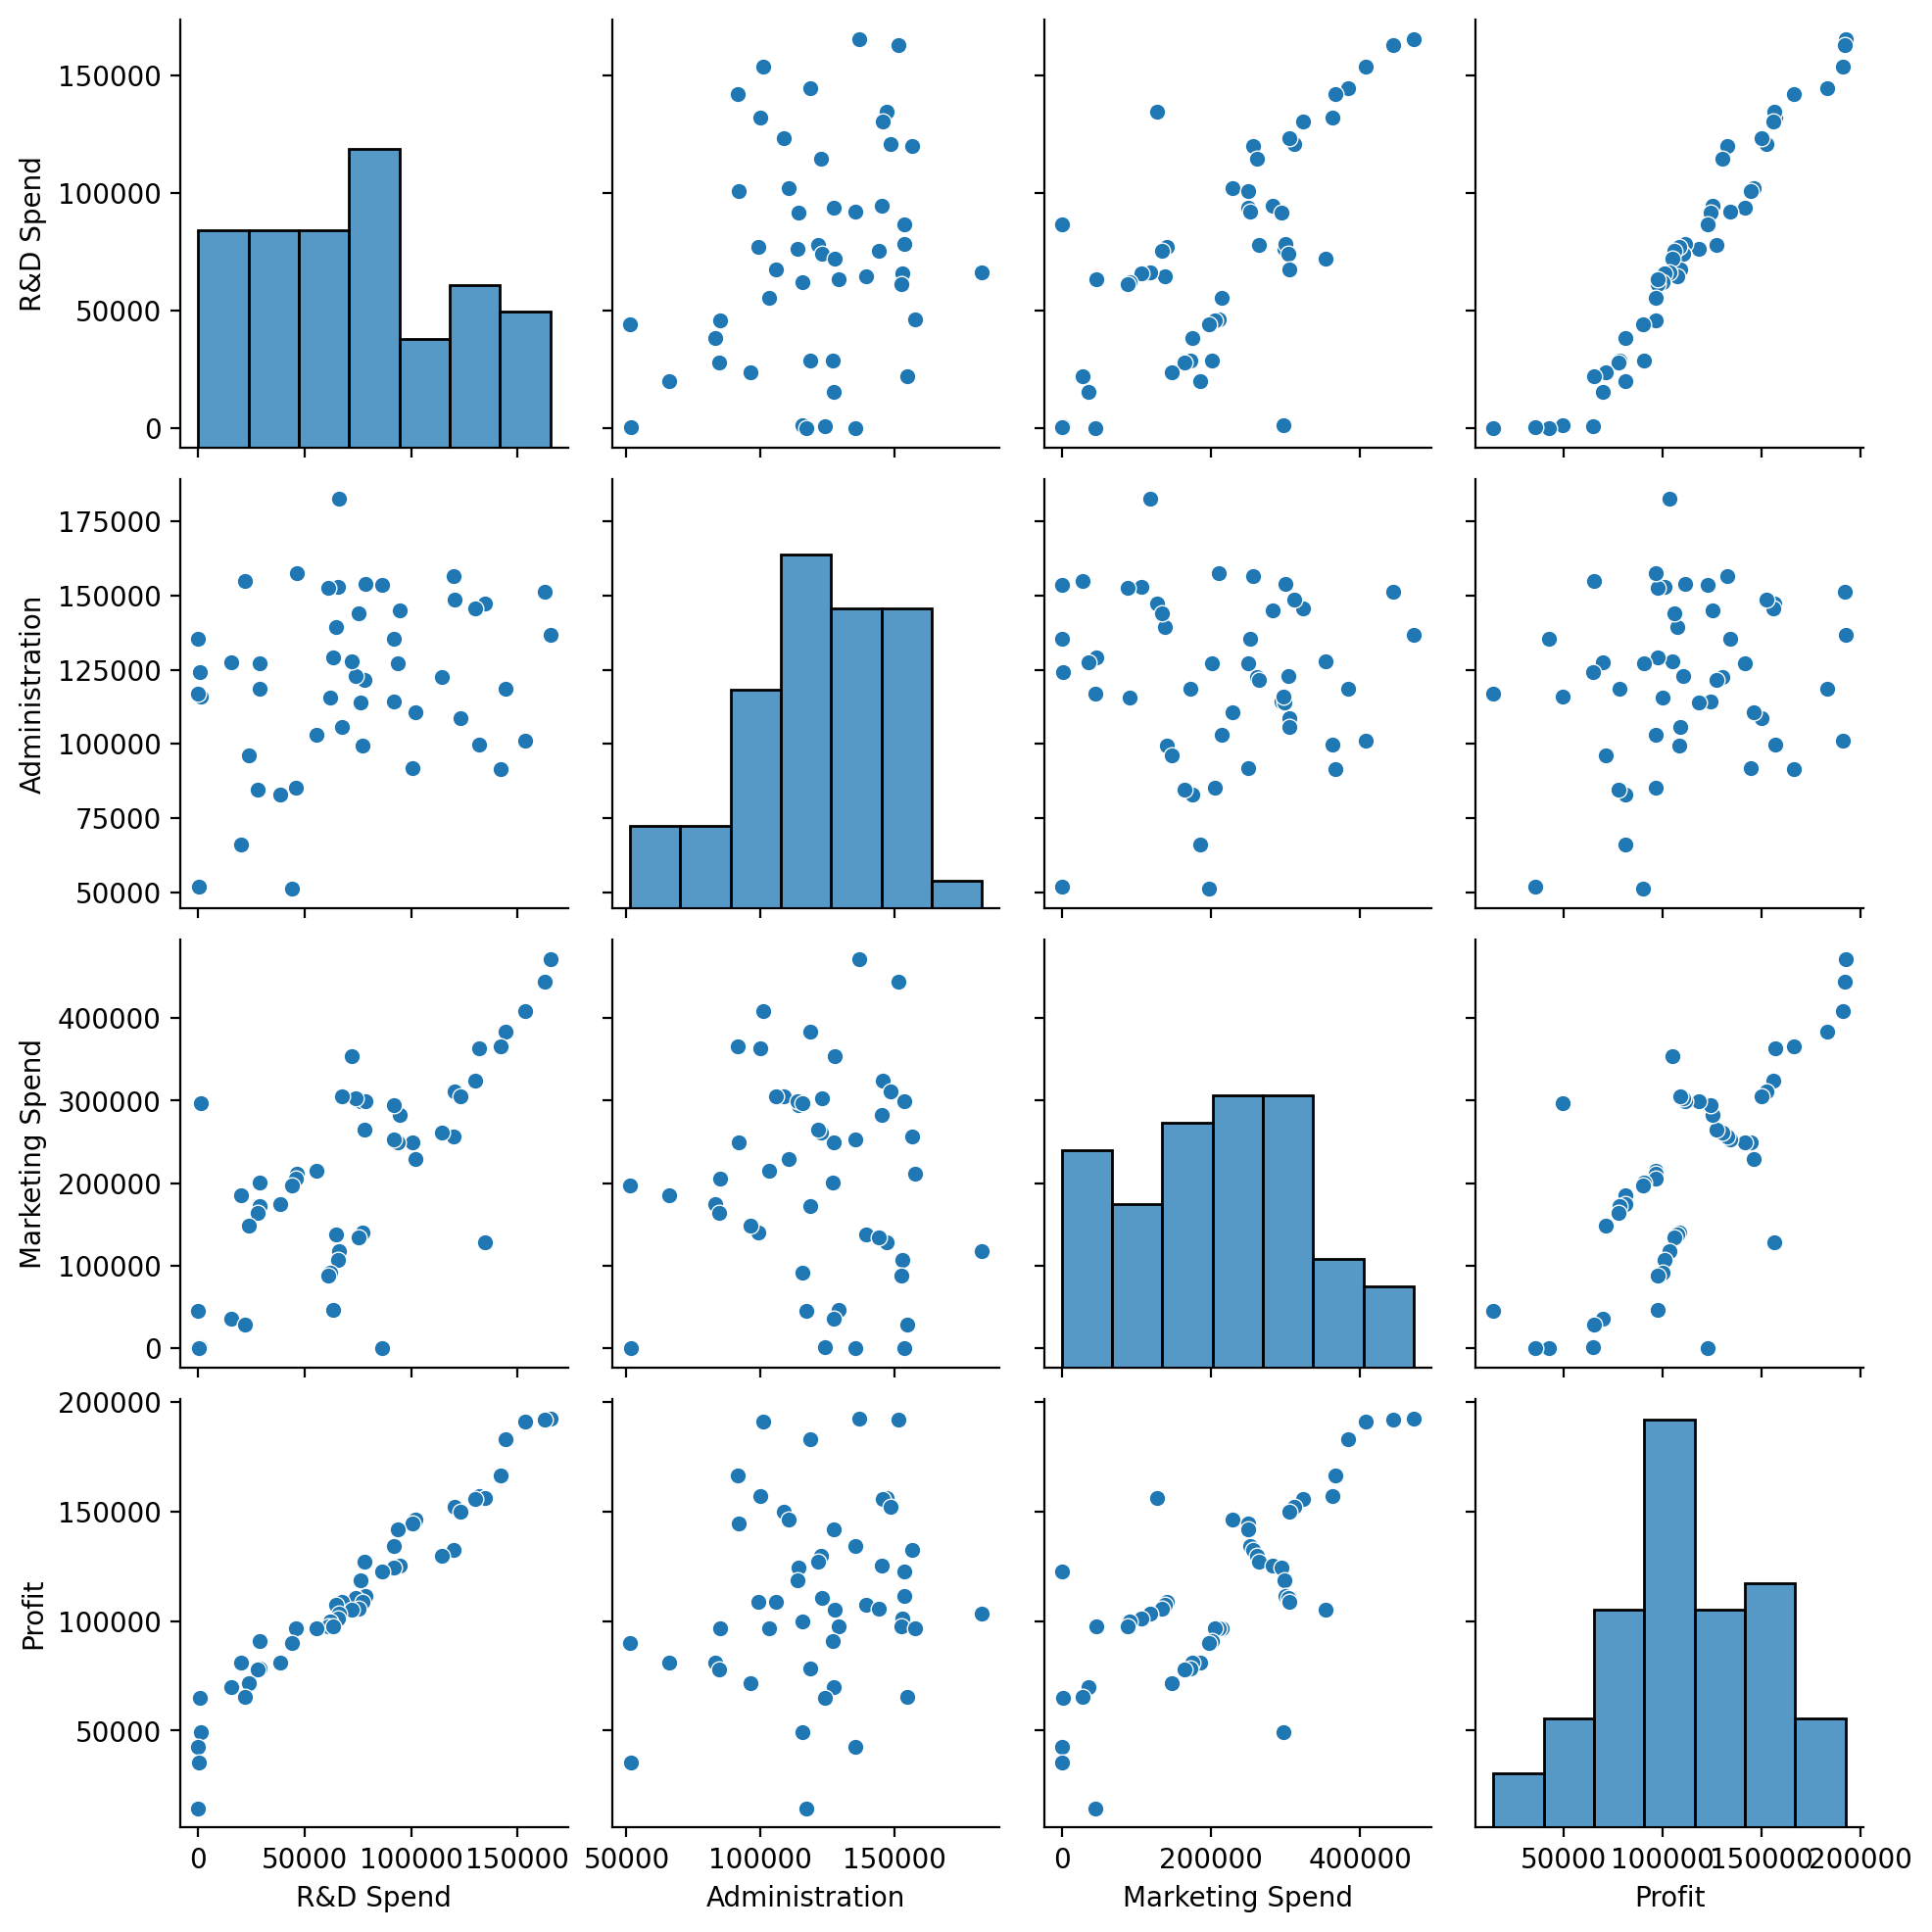

In [11]:
#plotting the data
sns.pairplot(df)

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [13]:
model=smf.ols('Profit~RDS+ADM+MS',data=sk).fit()

In [14]:
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [15]:
#t and p-values
print(model.tvalues,   model.pvalues)

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MS            1.655077
dtype: float64 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MS           1.047168e-01
dtype: float64


In [16]:
#r squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Models

In [17]:
#not significant variables are MS nd ADM

In [18]:
ml_v=smf.ols('Profit~MS',data=sk).fit()
#t and pvalue
print(ml_v.tvalues,    ml_v.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [19]:
ml_w=smf.ols('Profit~ADM',data=sk).fit()
#t and pvalue
print(ml_w.tvalues,  ml_v.pvalues)

Intercept    3.040044
ADM          1.419493
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [20]:
ml_vw=smf.ols('Profit~MS+ADM',data =sk).fit()
#t and pvalues
print(ml_vw.tvalues,    ml_vw.pvalues)

Intercept    1.142741
MS           8.281039
ADM          2.467779
dtype: float64 Intercept    2.589341e-01
MS           9.727245e-11
ADM          1.729198e-02
dtype: float64


In [21]:
#checking VIF
# calculate VIF = 1/(1-Rsquare) for all independent variables

In [22]:
rsq_s=smf.ols('RDS~ADM+MS',data=sk). fit().rsquared
vif_s=1/(1-rsq_s)

rsq_v=smf.ols('ADM~RDS+MS',data=sk). fit().rsquared
vif_v=1/(1-rsq_v)

rsq_k=smf.ols('MS~RDS+ADM',data=sk). fit().rsquared
vif_k=1/(1-rsq_k)

#putting the values in Dataframe format
S1={'Variable':['RDS','ADM','MS'], 'Vif':[vif_s, vif_v, vif_k]}
vif_df=pd.DataFrame(S1)
vif_df

,Variable,Vif
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

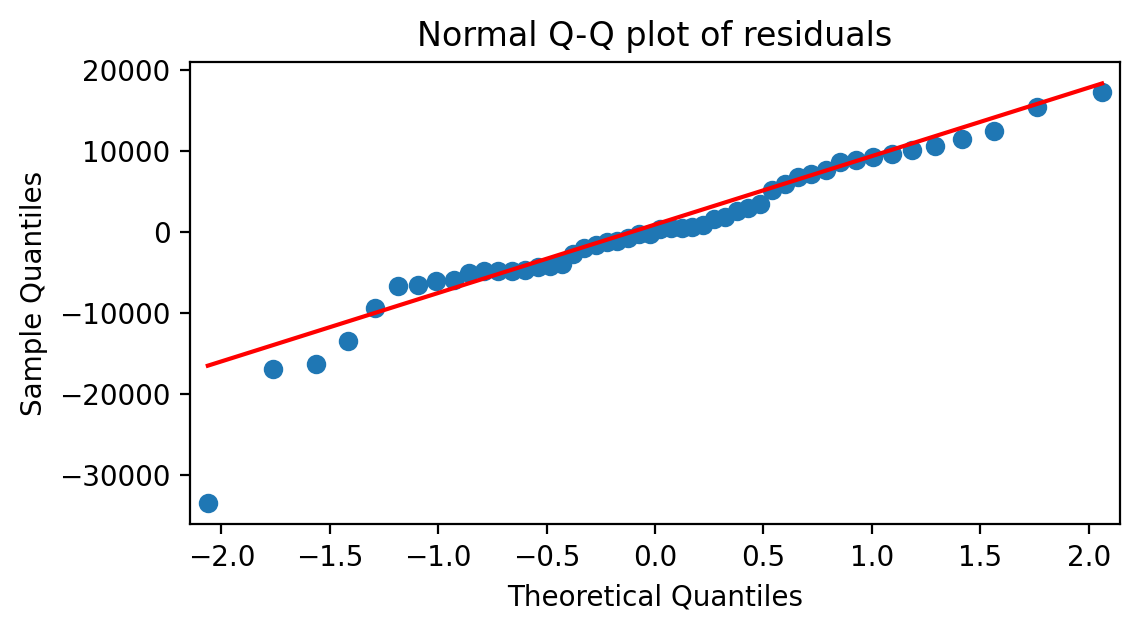

In [23]:
sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')

In [24]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [25]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

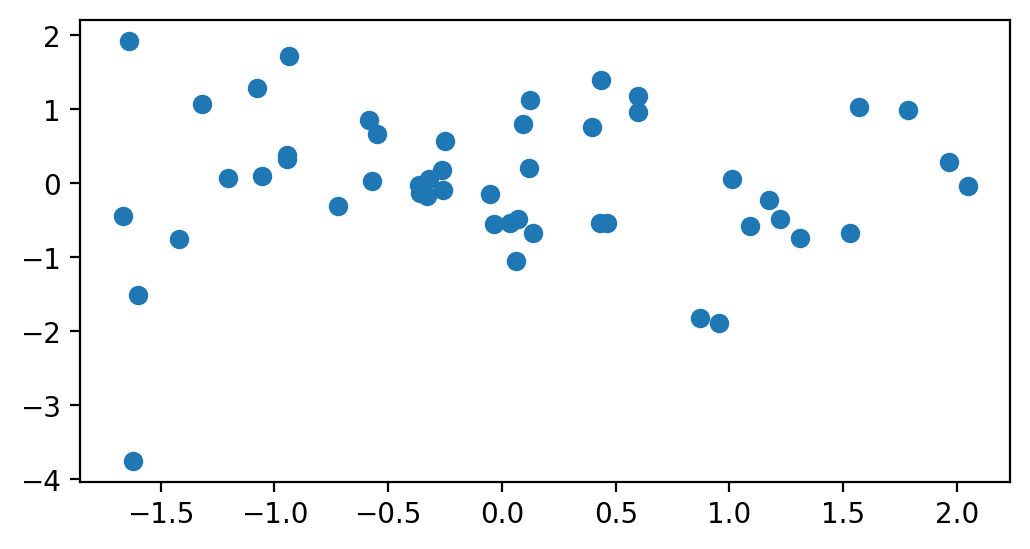

In [26]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

eval_env: 1


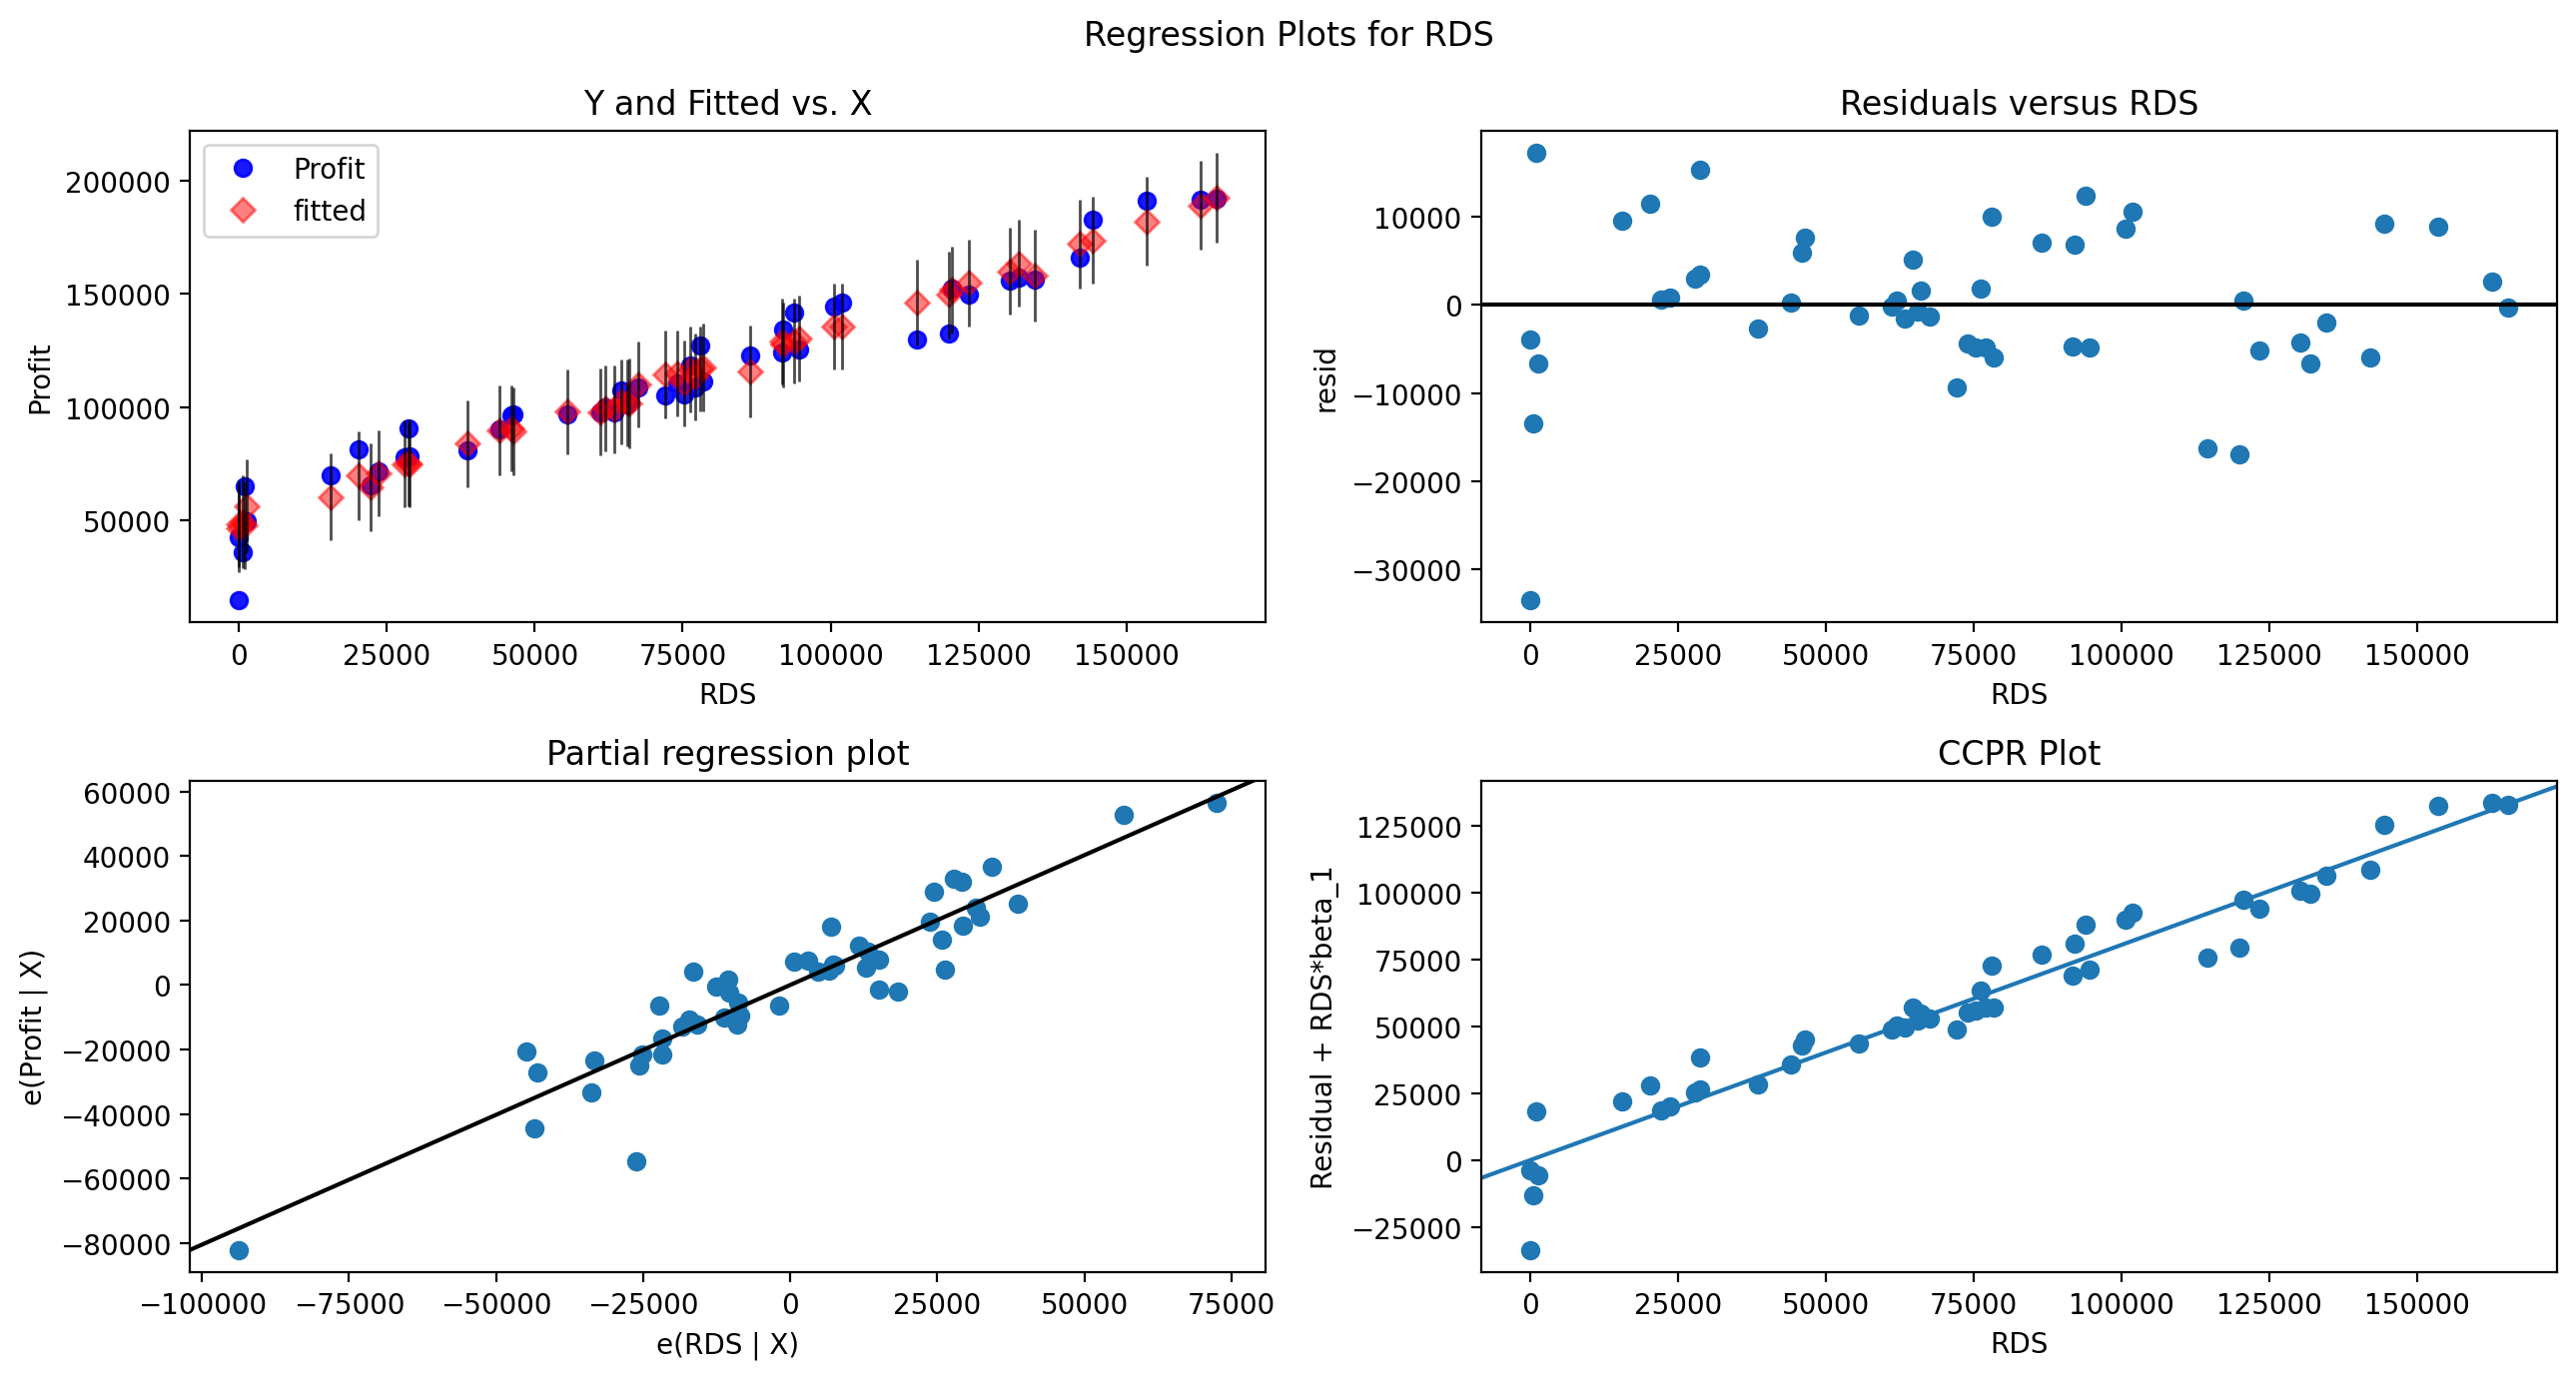

In [27]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)

eval_env: 1


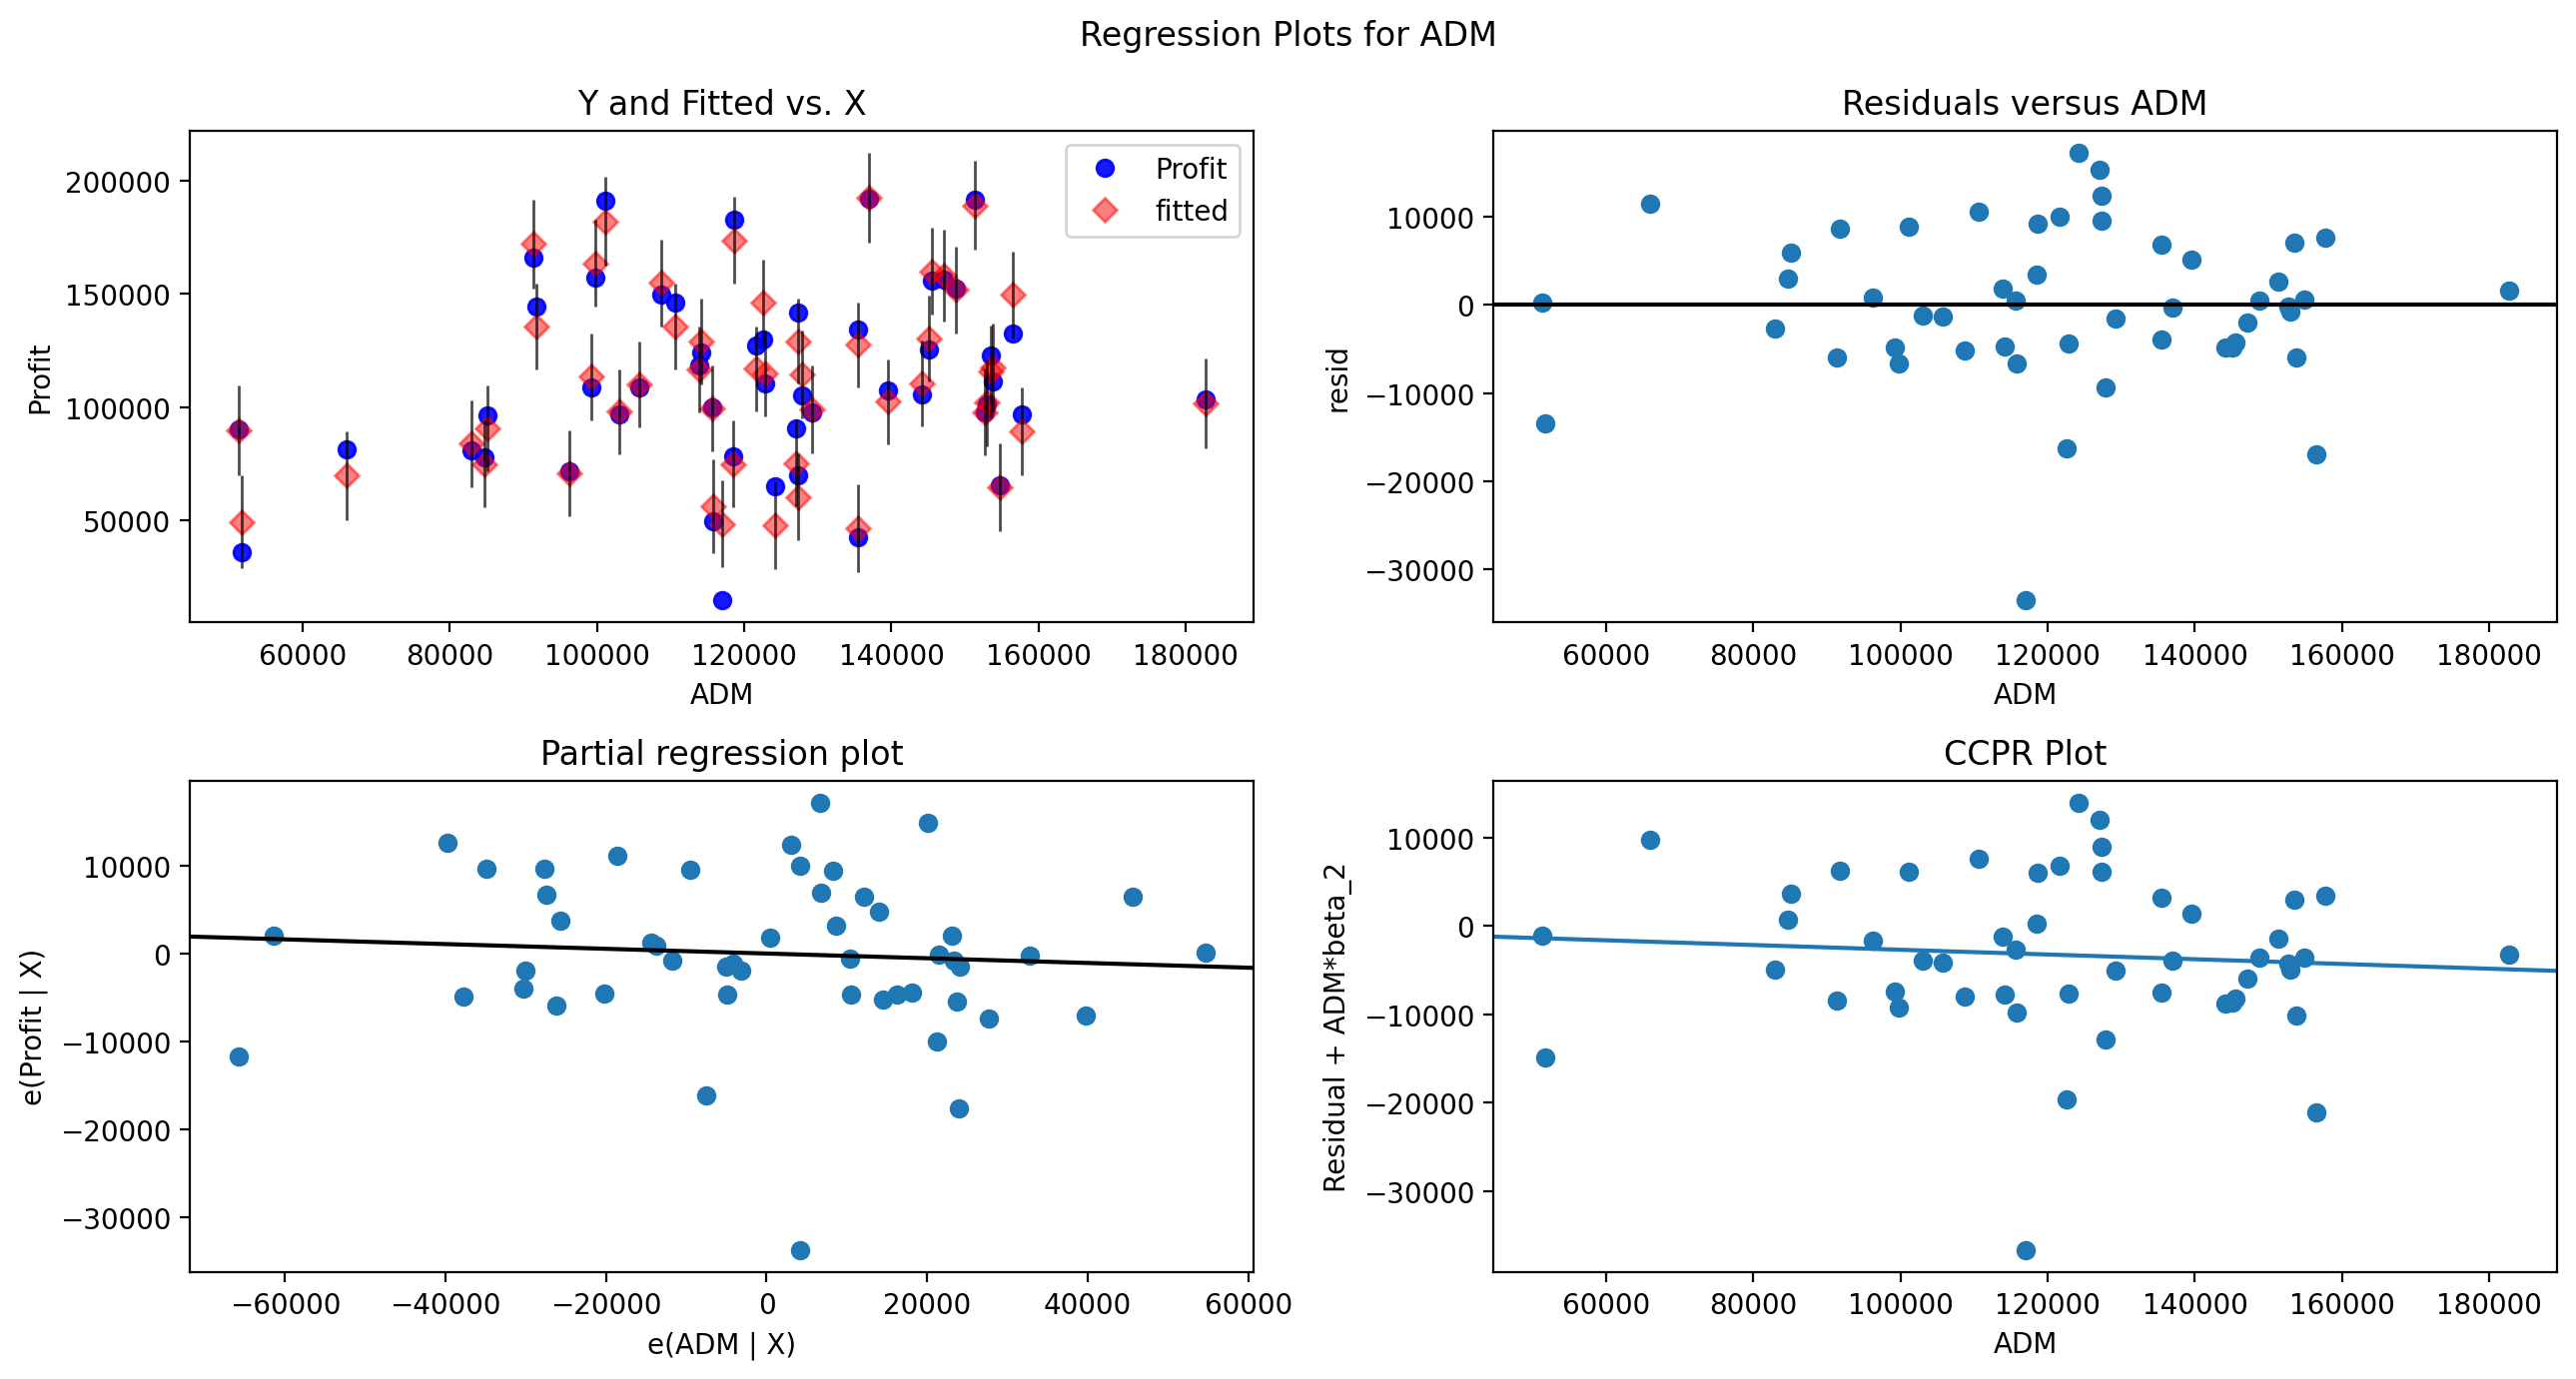

In [28]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model, 'ADM', fig=fig)

eval_env: 1


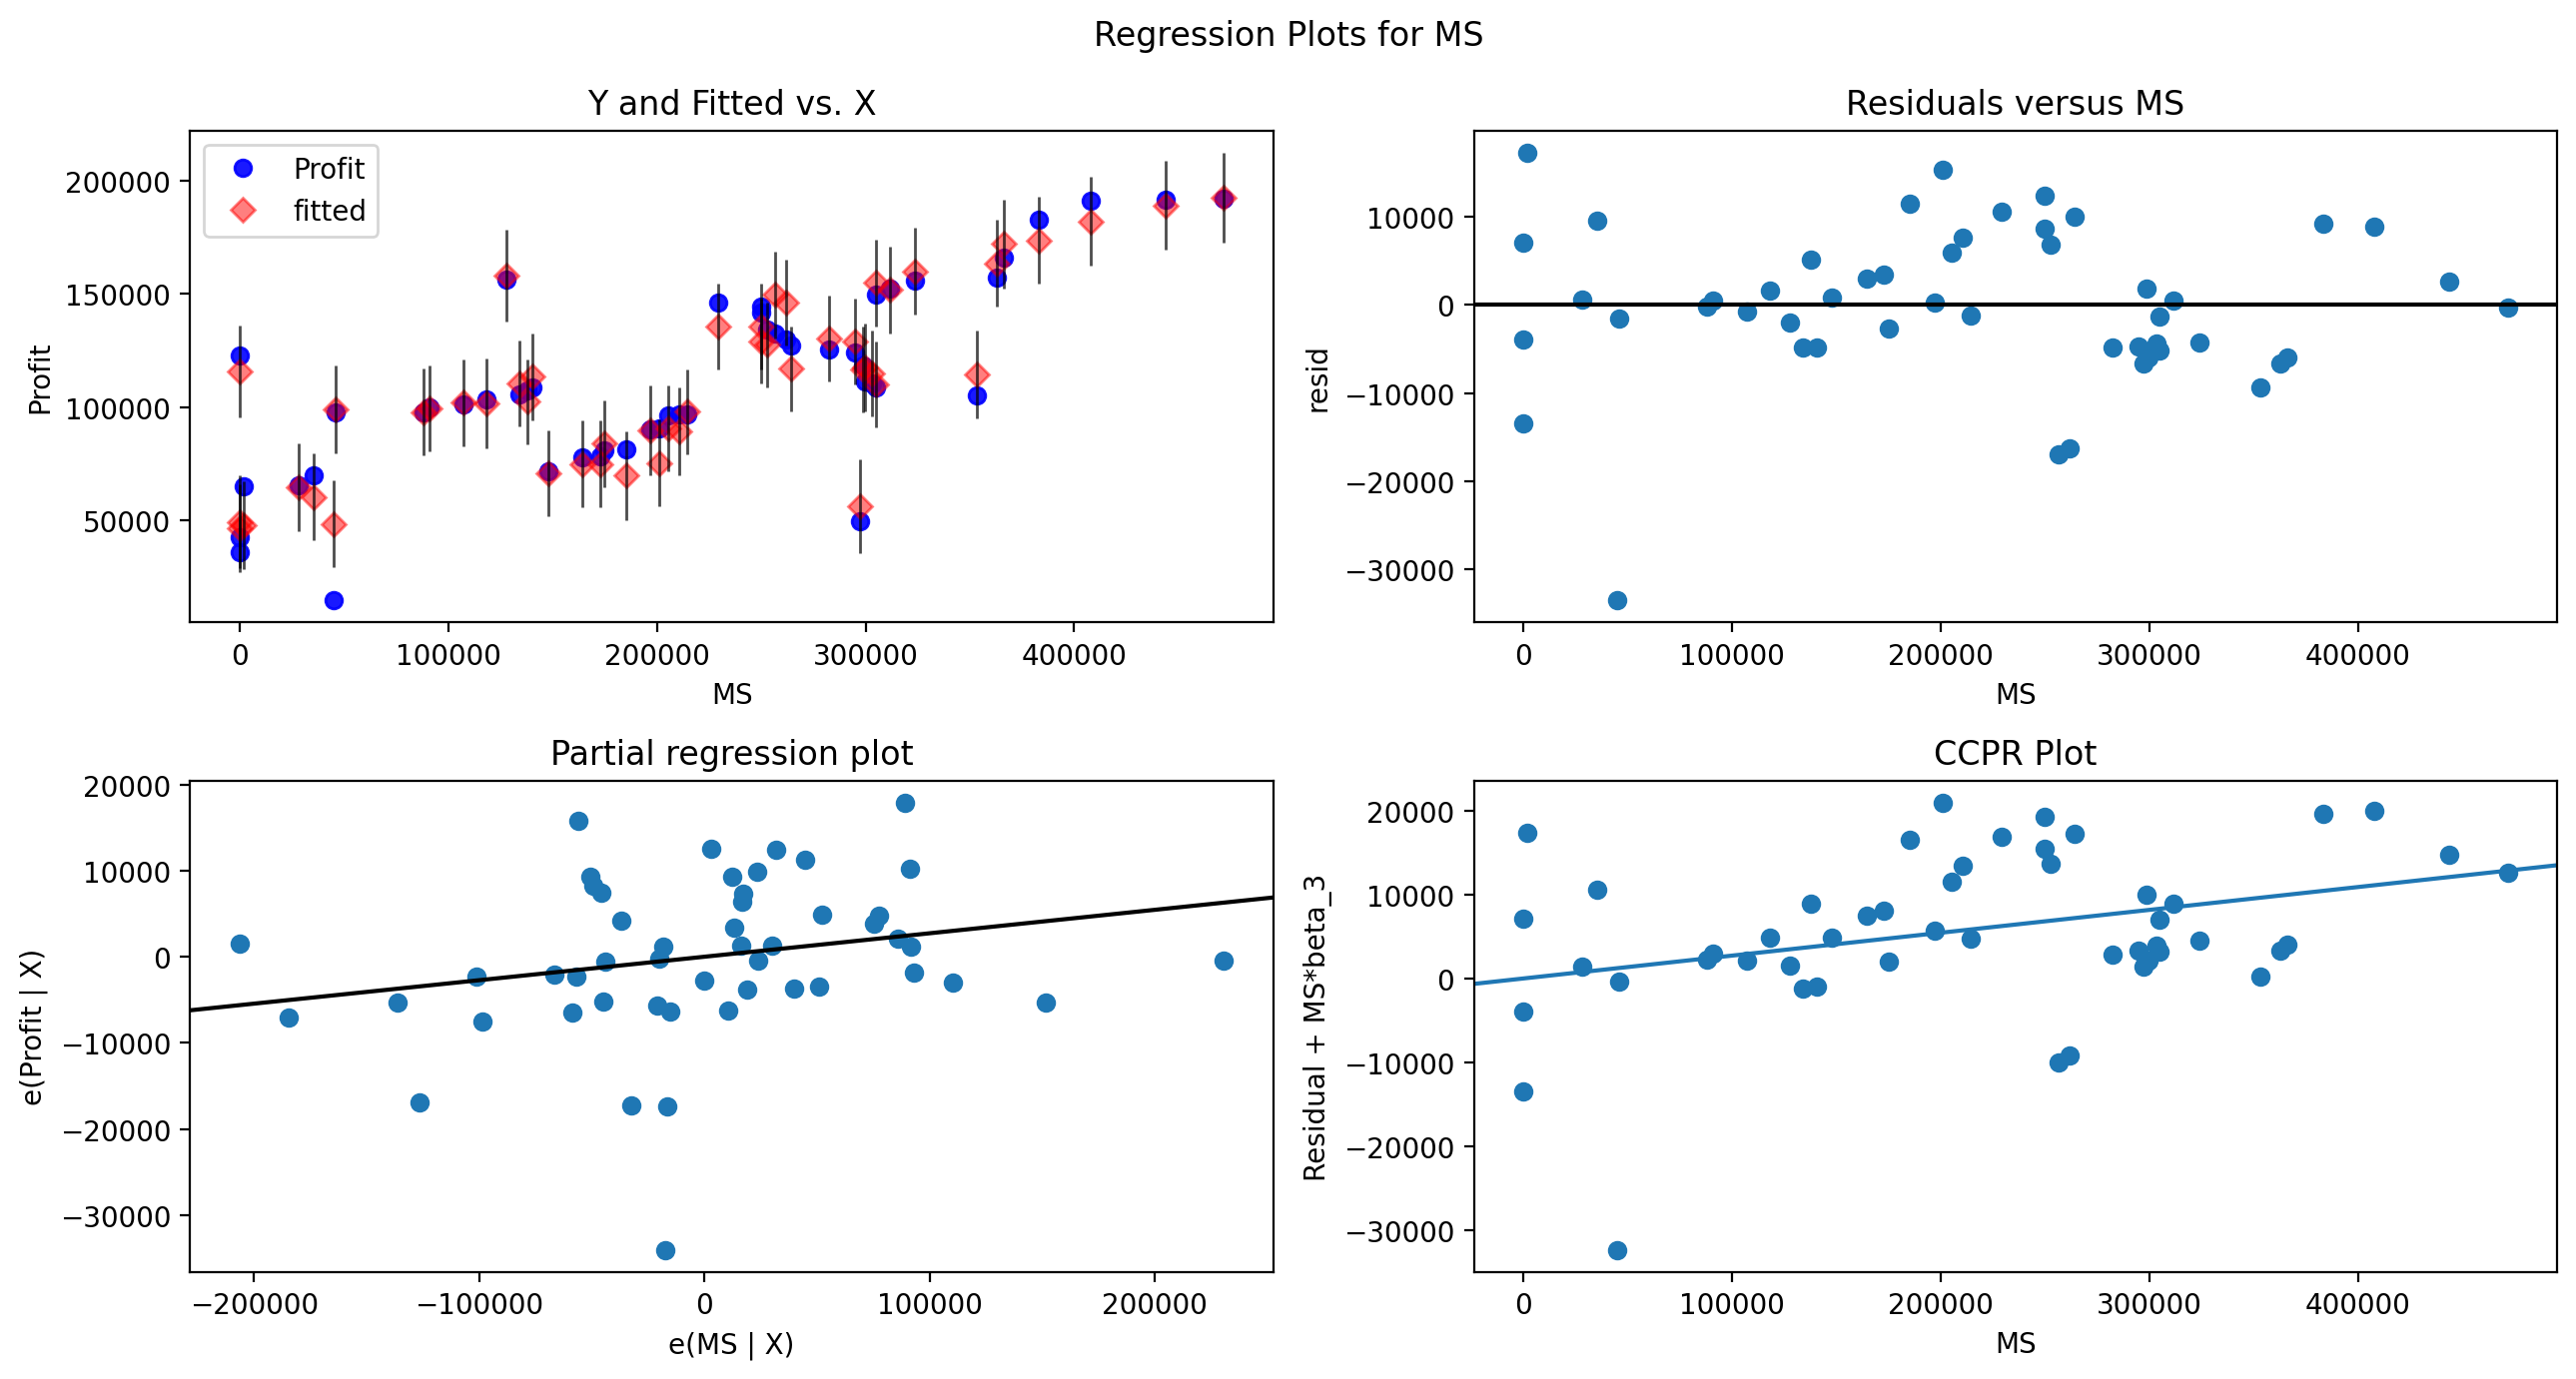

In [29]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig=fig)

In [30]:
#model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook's Distance

In [31]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks Distance')

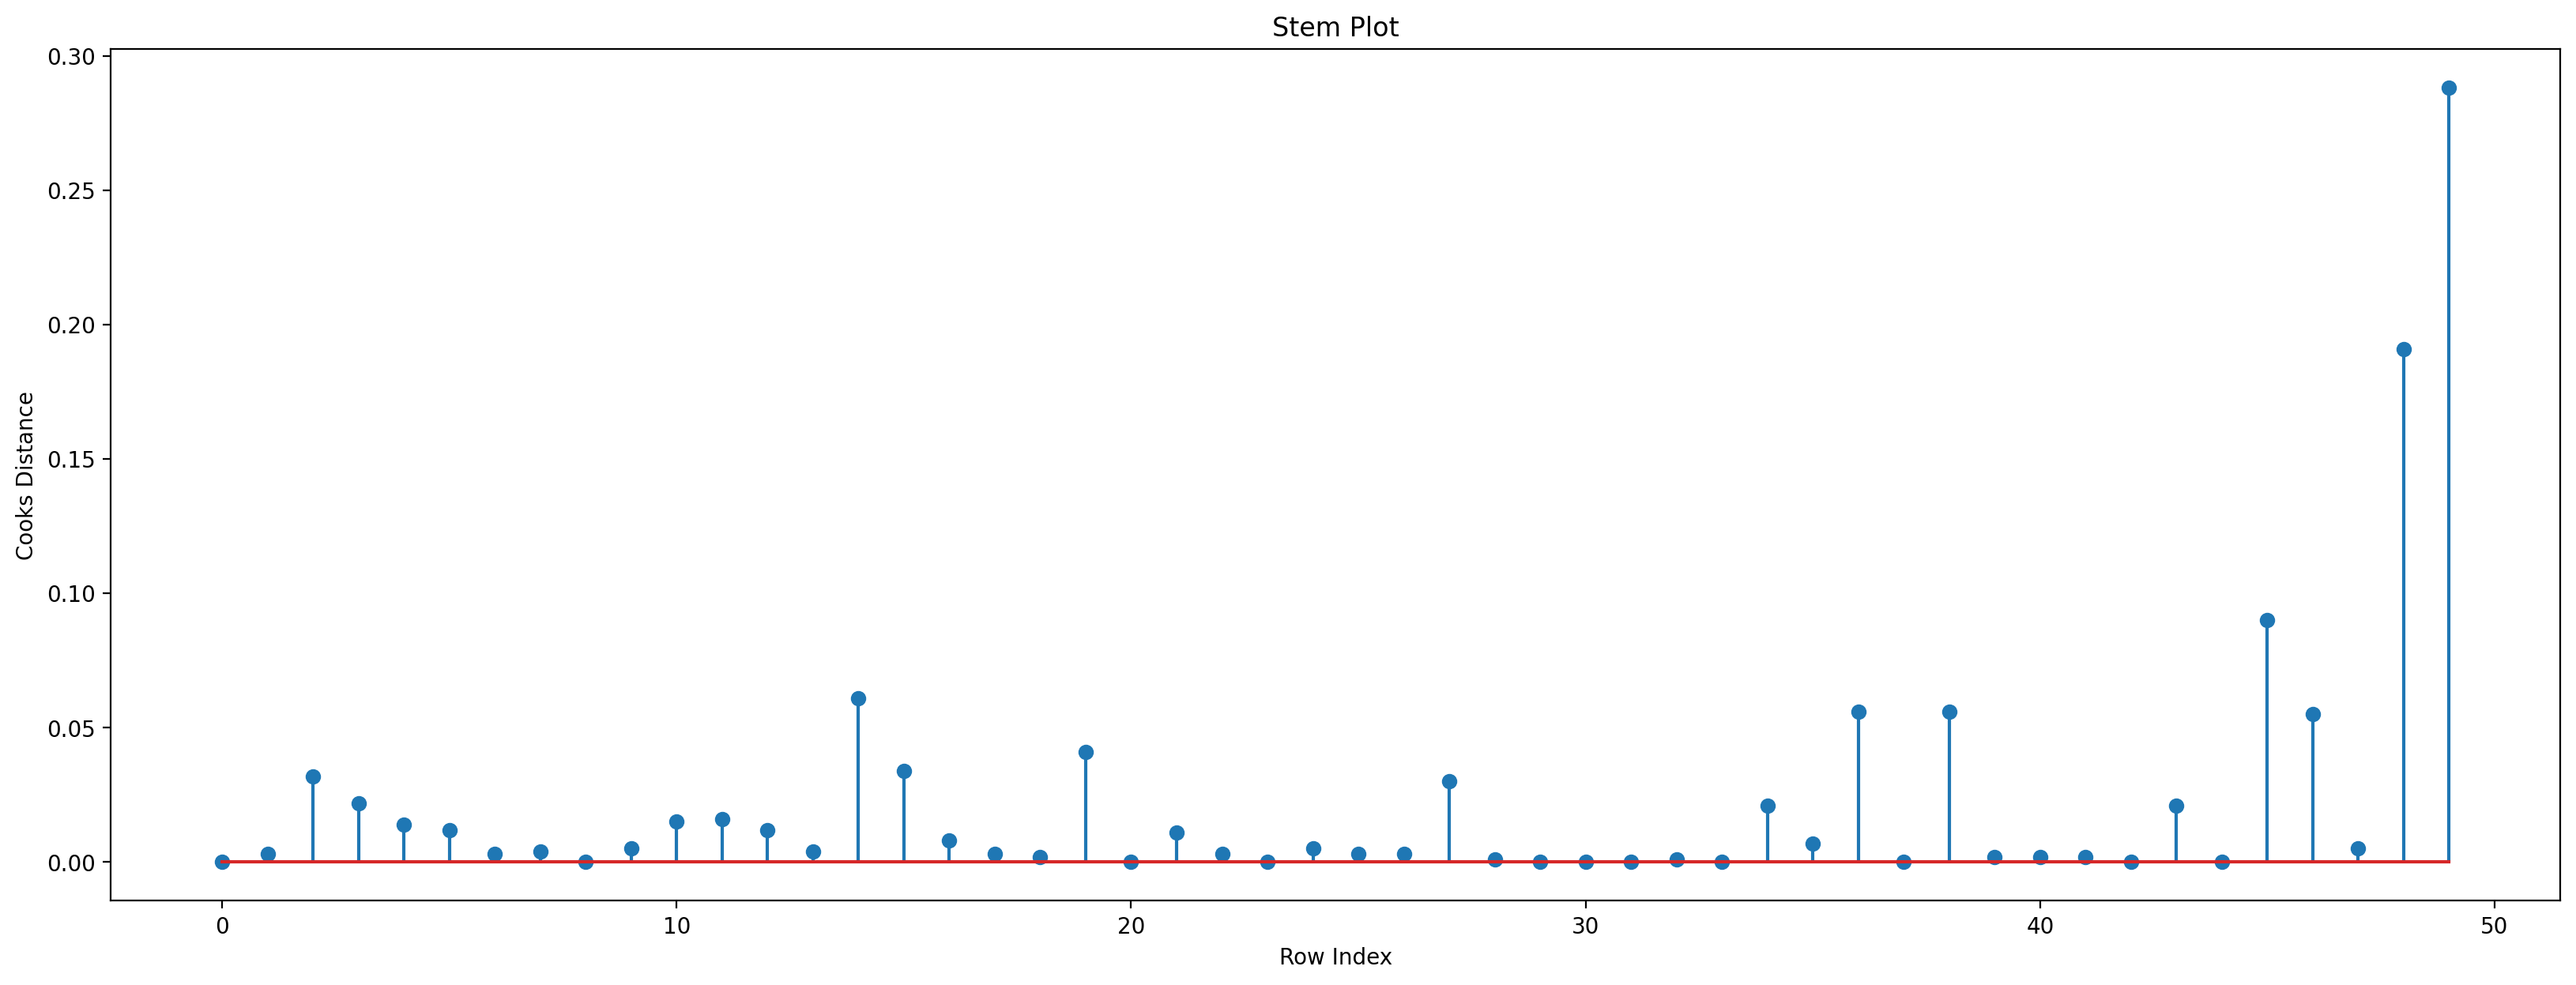

In [32]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(sk)), np.round (c, 3))
plt.title('Stem Plot')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [33]:
#index of the data points where c  is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

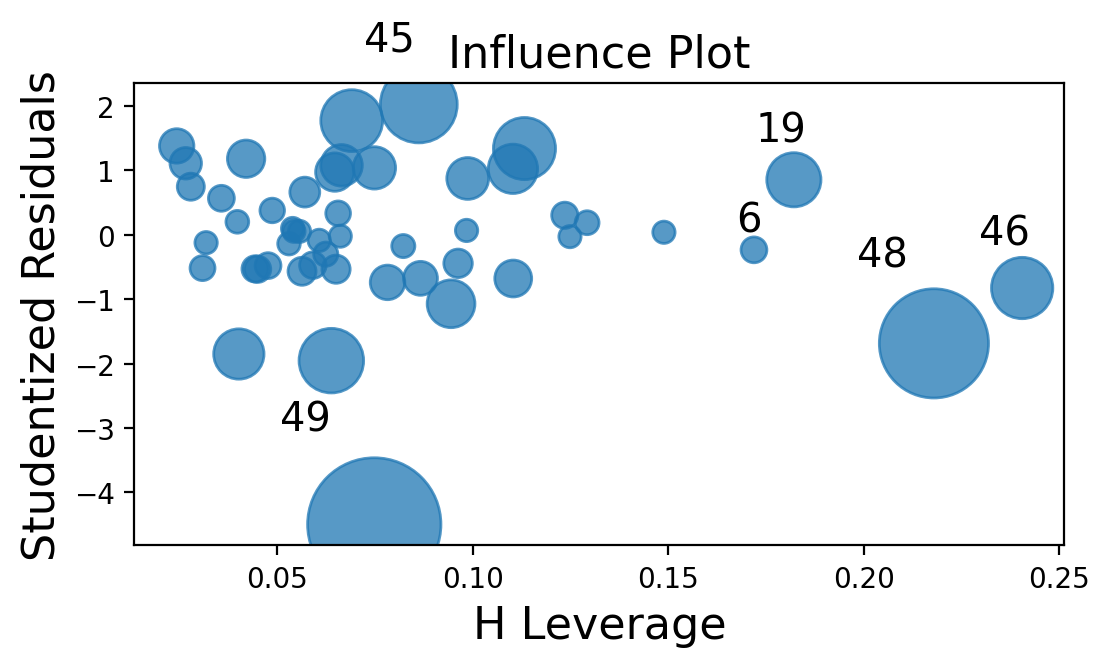

In [34]:
influence_plot(model)
plt.show()

In [35]:
k=sk.shape[1]
n=sk.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [36]:
sk[sk.index.isin([49])]

,RDS,ADM,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [37]:
sk1=sk.drop(sk.index[[49]],axis=0).reset_index(drop=True)
sk1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
while np.max(c)>0.5 :
    model=smf.ols('Profit~RDS+ADM+MS', data=data2).fit()
    (c,_)=model.get_influece().cooks_distance
    c
    np.argmax(c) , np.max(c)
    sk1=data2.drop(sk1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    sk1
else:
    final_model=smf.ols('Profit~RDS+ADM+MS', data=sk1).fit()
    final_model.rsquared , final_model.aic
    print('Thus model accuracy is improved to ', final_model.rsquared)

Thus model accuracy is improved to  0.9613162435129847


In [39]:
final_model.rsquared

0.9613162435129847

In [40]:
sk1

,RDS,ADM,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
new_data=pd.DataFrame({'RDS':90500, 'ADM':902500, 'MS':22000}, index=[0])
new_data

,RDS,ADM,MS
0,90500,902500,22000


In [42]:
final_model.predict(new_data)

0    103762.515647
dtype: float64

In [43]:
pred_y=final_model.predict(sk1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [44]:
S2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
r2table=pd.DataFrame(S2)
r2table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
